# Computer Infrastructure Assignment - Winter 2025

## YFinance Assessment


In [7]:
# Imports

# Dates and time
import datetime as dt 

# Yahoo Finance data
import yfinance as yf

# Data frames
import pandas as pd 

# Plot
import matplotlib.pyplot as plt

# File system operations
import os

# File pattern matching
import glob


## Problem 1: Data from yfinance

In this section I will use the yfinance Python package, already installed above.  
I will write a function called *get_data()* that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

I will then save the data that the function produces into the <b>data</b> folder, using a filename with the format YYYYMMDD-HHmmss.csv.

<b>Step 1: Downloading Data</b>

In [ ]:
# Collect data for all FAANG 
# stocks over past 5 days
df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d')  

# Check
df.head(3)

/tmp/ipykernel_40834/2982922660.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d')
[*********************100%***********************]  5 of 5 completed


Price            Close                                                  \
Ticker            AAPL        AMZN        GOOG        META        NFLX   
Date                                                                     
2025-11-28  278.850006  233.220001  320.119995  647.950012  107.580002   
2025-12-01  283.100006  233.880005  315.119995  640.869995  109.129997   
2025-12-02  286.190002  234.419998  316.019989  647.099976  109.349998   

Price             High                                                  ...  \
Ticker            AAPL        AMZN        GOOG        META        NFLX  ...   
Date                                                                    ...   
2025-11-28  279.000000  233.289993  326.880005  648.049988  107.940002  ...   
2025-12-01  283.420013  235.800003  319.630005  645.320007  109.339996  ...   
2025-12-02  287.399994  238.970001  318.600006  647.869995  109.730003  ...   

Price            Open                                                  \
Ticker           AAPL        AMZN        GOOG        META        NFLX   
Date                                                                    
2025-11-28  277.26001  231.240005  323.429993  636.080017  106.440002   
2025-12-01  278.01001  233.220001  317.475006  639.549988  106.510002   
2025-12-02  283.00000  235.009995  316.899994  642.340027  109.209999   

Price         Volume                                          
Ticker          AAPL      AMZN      GOOG      META      NFLX  
Date                                                          
2025-11-28  20135600  20292300  19695800  11033200  15021600  
2025-12-01  46587700  42904000  28520600  13029900  24873400  
2025-12-02  53669500  45785400  24668200  11640900  25763000  

[3 rows x 25 columns]

<b>Step 2: Creating Function</b>  

This section creates the function that downloads all hourly data for the previous five days.

In [ ]:
# Create function 
def get_data():
    tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"] # assign tickers
    data = yf.download( #
    tickers=tickers, #
    period="5d", #
    interval="1h", #
    auto_adjust=False #
    )

    return data # 

# Call function
get_data()

[*********************100%***********************]  5 of 5 completed


Price                       Adj Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-28 14:30:00+00:00  276.260010  231.479996  318.079987  641.385010   
2025-11-28 15:30:00+00:00  276.250000  231.940002  317.470001  644.494995   
2025-11-28 16:30:00+00:00  277.049988  232.104507  319.720001  645.299988   
2025-12-01 14:30:00+00:00  278.142090  232.880005  317.010010  639.494995   
2025-12-01 15:30:00+00:00  277.920013  233.970001  316.815002  642.734985   
2025-12-01 16:30:00+00:00  279.770508  234.365005  317.825012  643.510010   
2025-12-01 17:30:00+00:00  280.588196  234.960098  317.281708  641.674988   
2025-12-01 18:30:00+00:00  280.890015  234.179993  316.230011  642.338013   
2025-12-01 19:30:00+00:00  281.910004  234.478195  316.719910  641.234985   
2025-12-01 20:30:00+00:00  283.320007  233.949997  315.230011  640.909973   
2025-12-02 14:30:00+00:00  284.570007  234.720001  316.576996  642.252502   
2025-12-02 15:30:00+00:00  285.540009  234.390106  314.860107  639.468994   
2025-12-02 16:30:00+00:00  285.869995  236.190002  315.989990  644.830017   
2025-12-02 17:30:00+00:00  285.214996  235.160004  316.500000  645.890015   
2025-12-02 18:30:00+00:00  285.625000  234.982101  316.884308  646.239990   
2025-12-02 19:30:00+00:00  286.239990  235.500000  316.000000  647.005005   
2025-12-02 20:30:00+00:00  286.230011  234.369995  316.070007  647.090027   
2025-12-03 14:30:00+00:00  287.340515  231.399994  317.915009  643.404175   
2025-12-03 15:30:00+00:00  286.410004  232.180695  319.535004  642.580017   
2025-12-03 16:30:00+00:00  286.385010  232.470001  320.679993  645.823303   
2025-12-03 17:30:00+00:00  285.679291  231.960007  321.505005  644.700012   
2025-12-03 18:30:00+00:00  285.209991  231.924896  320.859985  644.184998   
2025-12-03 19:30:00+00:00  284.554993  232.610001  321.779999  644.118103   
2025-12-03 20:30:00+00:00  284.149994  232.369995  320.540009  639.739990   
2025-12-04 14:30:00+00:00  281.225006  228.774994  317.510010  665.729980   
2025-12-04 15:30:00+00:00  280.279999  227.899994  316.809998  664.849976   
2025-12-04 16:30:00+00:00  280.114990  227.169998  317.065002  668.190002   
2025-12-04 17:30:00+00:00  280.005005  228.300003  317.684998  664.765015   
2025-12-04 18:30:00+00:00  278.859985  228.309998  317.281006  662.799927   
2025-12-04 19:30:00+00:00  280.125000  228.708206  317.994995  660.634399   
2025-12-04 20:30:00+00:00  280.649994  229.100006  318.390015  661.729980   

Price                                       Close                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-11-28 14:30:00+00:00  107.440002  276.260010  231.479996  318.079987   
2025-11-28 15:30:00+00:00  107.440002  276.250000  231.940002  317.470001   
2025-11-28 16:30:00+00:00  107.525002  277.049988  232.104507  319.720001   
2025-12-01 14:30:00+00:00  107.910004  278.142090  232.880005  317.010010   
2025-12-01 15:30:00+00:00  108.380096  277.920013  233.970001  316.815002   
2025-12-01 16:30:00+00:00  108.559998  279.770508  234.365005  317.825012   
2025-12-01 17:30:00+00:00  108.906601  280.588196  234.960098  317.281708   
2025-12-01 18:30:00+00:00  108.610001  280.890015  234.179993  316.230011   
2025-12-01 19:30:00+00:00  109.059998  281.910004  234.478195  316.719910   
2025-12-01 20:30:00+00:00  109.190002  283.320007  233.949997  315.230011   
2025-12-02 14:30:00+00:00  108.165001  284.570007  234.720001  316.576996   
2025-12-02 15:30:00+00:00  107.925003  285.540009  234.390106  314.860107   
2025-12-02 16:30:00+00:00  108.449997  285.869995  236.190002  315.989990   
2025-12-02 17:30:00+00:00  108.959999  285.214996  235.160004  316.500000   
2025-12-02 18:30:00+00:00  109.320000  285.625000  234.982101  316.88430

https://realpython.com/defining-your-own-python-function/  
https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html

<b>Step 3: Saving Dataframe</b>

I saved the dataframe to a csv file in <b>data</b> folder.  
The dataframe was saved using a filename with the format of the current local date and time: YYYYMMDD-HHmmss.csv. 

In [ ]:
# get local date & time
local = dt.datetime.now().strftime("%Y%m%d-%H%M%S")

# Save data as csv
get_data().to_csv("./data/" +  # save to data folder 
                  local
                  + ".csv") 

[*********************100%***********************]  5 of 5 completed


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html  
https://docs.python.org/3/library/datetime.html 

## Problem 2: Plotting Data

Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks.  
The plot should include axis labels, a legend, and the date as a title.  
The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png.

In [5]:
# View columns
get_data().columns

[*********************100%***********************]  5 of 5 completed


MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'AMZN'),
            ('Adj Close', 'GOOG'),
            ('Adj Close', 'META'),
            ('Adj Close', 'NFLX'),
            (    'Close', 'AAPL'),
            (    'Close', 'AMZN'),
            (    'Close', 'GOOG'),
            (    'Close', 'META'),
            (    'Close', 'NFLX'),
            (     'High', 'AAPL'),
            (     'High', 'AMZN'),
            (     'High', 'GOOG'),
            (     'High', 'META'),
            (     'High', 'NFLX'),
            (      'Low', 'AAPL'),
            (      'Low', 'AMZN'),
            (      'Low', 'GOOG'),
            (      'Low', 'META'),
            (      'Low', 'NFLX'),
            (     'Open', 'AAPL'),
            (     'Open', 'AMZN'),
            (     'Open', 'GOOG'),
            (     'Open', 'META'),
            (     'Open', 'NFLX'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'AMZN'),
            (   'Volume', 'GOOG'),
            (   'Vol

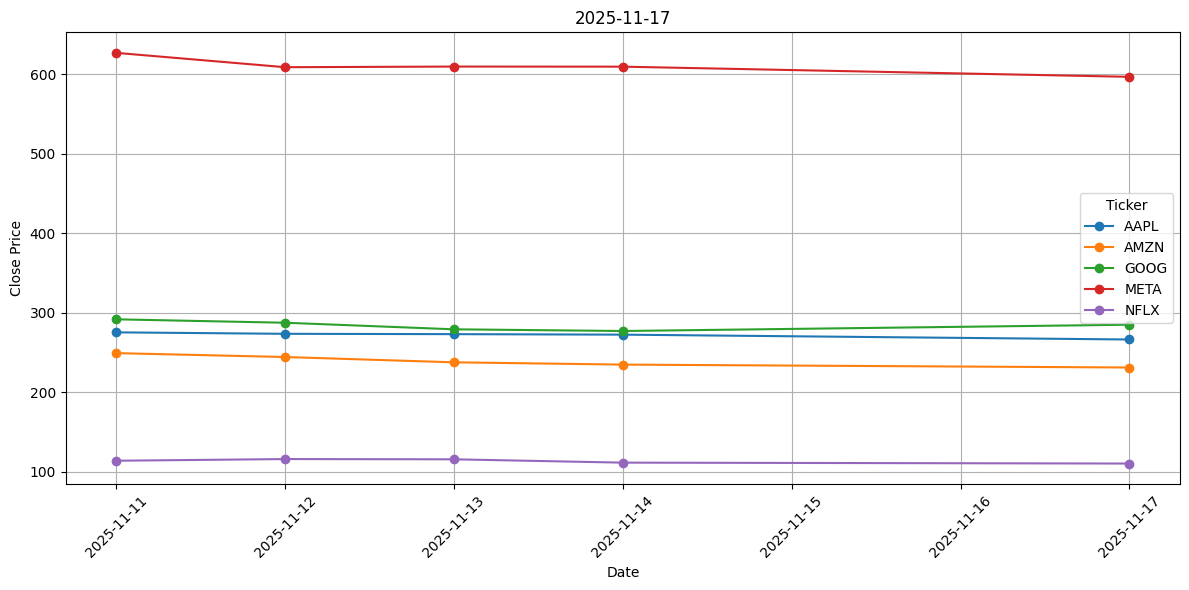

In [ ]:
def plot_data():
    list_of_files = glob.glob('./data/*') # get all files from data folder
    latest_file = max(list_of_files, key=os.path.getctime) # get latest file

    df2 = pd.read_csv(latest_file, header=[0,1], index_col=0)
    df2.index = pd.to_datetime(df2.index) # convert index to datetime to allow for date formatting

    faang = ['AAPL', 'AMZN', 'GOOG', 'META', 'NFLX'] # define tickers

    date_str = os.path.basename(latest_file).split("-")[0] # extract 1st 8 digits from filename to get date
    date = dt.datetime.strptime(date_str, "%Y%m%d").strftime("%Y-%m-%d") # format date for readability

    last_per_day = df2['Close'][faang].groupby(df2.index.date).last() # group by date and take last close price of each day
    last_5_days = last_per_day.tail(5) # select last 5 days 
    
    # plot data
    last_5_days.plot(figsize=(12,6), marker='o') # set figsize and markers for clarity

    # add titles & labels
    plt.title(f"{date}")
    plt.xticks(rotation=45) # rotate x axis for readability 
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.tight_layout()

    filename = os.path.join("./plots", f"{local}.png") # join filename and filename + create filename
    plt.savefig(filename, dpi=300)

    plt.show()

plot_data()

    
# https://sqlpey.com/python/top-10-methods-to-retrieve-latest-file-in-a-folder-using-python/
# https://www.geeksforgeeks.org/python/how-to-use-glob-function-to-find-files-recursively-in-python/
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
# https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html
# https://www.geeksforgeeks.org/python/python-os-path-basename-method/
# https://www.geeksforgeeks.org/python/python-datetime-strptime-function/
# https://www.geeksforgeeks.org/python/python-strftime-function/
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.last.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html 
# https://www.geeksforgeeks.org/python/python-os-path-join-method/


## Problem 3: Script

The purpose of Problem 3 was to take the functions developed in Problems 1 and 2 and turn them into an executable Python script called faang.py.  
The script is required to run directly from the terminal for all users through the following command: <i>./faang.py</i>.

Below are the full steps I completed, along with links to documentation used to research each step of the process. 

<b>Step 1: Creating faang.py File</B>

I created a new Python script in the root of my repository named: faang.py  
This file will contain the functions for downloading and plotting FAANG stock data.

<b>Step 2: Adding Shebang Line</b>  

At the top of the file, I added a shebang line: #!/usr/bin/env python3  
The shebang line <i>#!/usr/bin/env python3</i> tells the operating system to run the script using Python3 and allows it to be executed directly with <i>./faang.py</i> ([Real Python](https://realpython.com/python-shebang/)).  
Using env makes the script more portable because it finds the correct Python interpreter on any system ([Real Python](https://realpython.com/python-shebang/)),  

<b>Step 3: Copying Functions into Script</b>  

Below the shebang line, I added all necessary imports and then copied the two functions I created earlier:

- my get_data() function from Problem 1

- my plot_data() function from Problem 2

<b>Step 4: Making the Script Executable</b>  
  
To make the script executable so it can be run like a program, I used the linux command <i>chmod +x faang.py</i> ([GeeksforGeeks](https://www.geeksforgeeks.org/linux-unix/what-does-chmod-x-do-and-how-to-use-it/)).  
<i>chmod</i> is used to change permissions, <i>+</i> adds permissions, whilst <i>x</i> grants execute permission.  

Afterwards, I ran the linux command <i>ls -l</i> to confirm that the file permissions had updated correctly and that faang.py was now marked as executable.  
<i>ls -l</i> displays files and directories in a detailed long format, showing their permissions, ownership, size, type, modification date, and other metadata ([Red Hat](https://www.redhat.com/en/blog/linux-file-permissions-explained?utm_source=chatgpt.com)).

<b>Step 5: Running Script</b>  

Finally, I ran the script in the terminal using: <i>./faang.py</i>  

This executed the script and confirmed that:

- the FAANG data was downloaded correctly

- the CSV file was saved in the <b>data</b> folder

- the plot was created and saved in the <b>plots</b> folder

## Problem 4: Automation

Create a GitHub Actions workflow to run your script every Saturday morning.  
The script should be called faang.yml in a .github/workflows/ folder in the root of your repository.  
In your notebook, explain each of the individual lines in your workflow.

In [7]:
# add

## End